In [1]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.summary()

144547840/170498071 [========================>.....] - ETA: 6s

170500096/170498071 [==============================] - 44s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_

In [4]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

Using real-time data augmentation.


In [5]:
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/100
 685/1563 [============>.................] - ETA: 33s - loss: 2.0813 - acc: 0.2232

1563/1563 [==============================] - 58s 37ms/step - loss: 1.9125 - acc: 0.2937 - val_loss: 1.6294 - val_acc: 0.4196
Epoch 2/100
 507/1563 [========>.....................] - ETA: 36s - loss: 1.6716 - acc: 0.3833

1563/1563 [==============================] - 56s 36ms/step - loss: 1.6136 - acc: 0.4090 - val_loss: 1.4084 - val_acc: 0.4818
Epoch 3/100
 454/1563 [=======>......................] - ETA: 38s - loss: 1.5332 - acc: 0.4409

1563/1563 [==============================] - 56s 36ms/step - loss: 1.4961 - acc: 0.4551 - val_loss: 1.3489 - val_acc: 0.5193
Epoch 4/100
 432/1563 [=======>......................] - ETA: 38s - loss: 1.4269 - acc: 0.4893

1563/1563 [==============================] - 56s 36ms/step - loss: 1.4020 - acc: 0.4952 - val_loss: 1.2353 - val_acc: 0.5599
Epoch 5/100
 420/1563 [=======>......................] - ETA: 39s - loss: 1.3500 - acc: 0.5179

1563/1563 [==============================] - 57s 36ms/step - loss: 1.3301 - acc: 0.5248 - val_loss: 1.2783 - val_acc: 0.5426
Epoch 6/100
 430/1563 [=======>......................] - ETA: 39s - loss: 1.2798 - acc: 0.5395

1563/1563 [==============================] - 56s 36ms/step - loss: 1.2723 - acc: 0.5465 - val_loss: 1.2018 - val_acc: 0.5736
Epoch 7/100
 418/1563 [=======>......................] - ETA: 39s - loss: 1.2348 - acc: 0.5614

1563/1563 [==============================] - 56s 36ms/step - loss: 1.2235 - acc: 0.5649 - val_loss: 1.0505 - val_acc: 0.6235
Epoch 8/100
 401/1563 [======>.......................] - ETA: 40s - loss: 1.1776 - acc: 0.5838

1563/1563 [==============================] - 57s 36ms/step - loss: 1.1846 - acc: 0.5820 - val_loss: 1.1518 - val_acc: 0.6004
Epoch 9/100
 397/1563 [======>.......................] - ETA: 39s - loss: 1.1440 - acc: 0.5965

1563/1563 [==============================] - 56s 36ms/step - loss: 1.1512 - acc: 0.5938 - val_loss: 0.9820 - val_acc: 0.6567
Epoch 10/100
 423/1563 [=======>......................] - ETA: 39s - loss: 1.1332 - acc: 0.5988

1563/1563 [==============================] - 56s 36ms/step - loss: 1.1185 - acc: 0.6046 - val_loss: 0.9996 - val_acc: 0.6513
Epoch 11/100
 421/1563 [=======>......................] - ETA: 39s - loss: 1.1005 - acc: 0.6093

1563/1563 [==============================] - 57s 36ms/step - loss: 1.0913 - acc: 0.6143 - val_loss: 0.9848 - val_acc: 0.6572
Epoch 12/100
 406/1563 [======>.......................] - ETA: 40s - loss: 1.0637 - acc: 0.6280

1563/1563 [==============================] - 56s 36ms/step - loss: 1.0637 - acc: 0.6250 - val_loss: 0.9791 - val_acc: 0.6558
Epoch 13/100
 393/1563 [======>.......................] - ETA: 40s - loss: 1.0495 - acc: 0.6302

1563/1563 [==============================] - 57s 36ms/step - loss: 1.0451 - acc: 0.6336 - val_loss: 0.9549 - val_acc: 0.6648
Epoch 14/100
 384/1563 [======>.......................] - ETA: 41s - loss: 1.0485 - acc: 0.6300

1563/1563 [==============================] - 57s 36ms/step - loss: 1.0206 - acc: 0.6425 - val_loss: 0.8636 - val_acc: 0.6981
Epoch 15/100
 377/1563 [======>.......................] - ETA: 41s - loss: 1.0159 - acc: 0.6421

1563/1563 [==============================] - 56s 36ms/step - loss: 1.0044 - acc: 0.6480 - val_loss: 0.8831 - val_acc: 0.6944
Epoch 16/100
 398/1563 [======>.......................] - ETA: 40s - loss: 0.9963 - acc: 0.6491

1563/1563 [==============================] - 57s 36ms/step - loss: 0.9859 - acc: 0.6540 - val_loss: 0.8576 - val_acc: 0.7056
Epoch 17/100
 394/1563 [======>.......................] - ETA: 40s - loss: 0.9855 - acc: 0.6562

1563/1563 [==============================] - 57s 36ms/step - loss: 0.9703 - acc: 0.6579 - val_loss: 0.8302 - val_acc: 0.7113
Epoch 18/100
 392/1563 [======>.......................] - ETA: 40s - loss: 0.9769 - acc: 0.6567

1563/1563 [==============================] - 56s 36ms/step - loss: 0.9578 - acc: 0.6651 - val_loss: 0.8751 - val_acc: 0.6975
Epoch 19/100
 407/1563 [======>.......................] - ETA: 40s - loss: 0.9275 - acc: 0.6789

1563/1563 [==============================] - 57s 36ms/step - loss: 0.9426 - acc: 0.6710 - val_loss: 0.8539 - val_acc: 0.7113
Epoch 20/100
 410/1563 [======>.......................] - ETA: 39s - loss: 0.9403 - acc: 0.6741

1563/1563 [==============================] - 56s 36ms/step - loss: 0.9366 - acc: 0.6755 - val_loss: 0.8089 - val_acc: 0.7180
Epoch 21/100
 408/1563 [======>.......................]

1563/1563 [==============================] - 57s 36ms/step - loss: 0.9179 - acc: 0.6797 - val_loss: 0.8059 - val_acc: 0.7195
Epoch 22/100
 411/1563 [======>.......................] - ETA: 40s - loss: 0.9142 - acc: 0.6839

1563/1563 [==============================] - 57s 36ms/step - loss: 0.9126 - acc: 0.6834 - val_loss: 0.7916 - val_acc: 0.7263
Epoch 23/100
 404/1563 [======>.......................] - ETA: 40s - loss: 0.9191 - acc: 0.6824

1563/1563 [==============================] - 57s 36ms/step - loss: 0.9102 - acc: 0.6840 - val_loss: 0.8851 - val_acc: 0.7033
Epoch 24/100
 406/1563 [======>.......................] - ETA: 40s - loss: 0.8946 - acc: 0.6927

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8983 - acc: 0.6876 - val_loss: 0.8078 - val_acc: 0.7250
Epoch 25/100
 409/1563 [======>.......................] - ETA: 39s - loss: 0.8898 - acc: 0.6941

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8876 - acc: 0.6925 - val_loss: 0.7945 - val_acc: 0.7301
Epoch 26/100
 416/1563 [======>.......................] - ETA: 39s - loss: 0.8772 - acc: 0.6972

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8762 - acc: 0.6957 - val_loss: 0.7836 - val_acc: 0.7333
Epoch 27/100
 401/1563 [======>.......................] - ETA: 40s - loss: 0.8875 - acc: 0.6976

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8726 - acc: 0.7006 - val_loss: 0.7563 - val_acc: 0.7394
Epoch 28/100
 410/1563 [======>.......................] - ETA: 39s - loss: 0.8598 - acc: 0.7039

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8652 - acc: 0.7025 - val_loss: 0.7680 - val_acc: 0.7438
Epoch 29/100
 415/1563 [======>.......................] - ETA: 39s - loss: 0.8599 - acc: 0.7058

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8626 - acc: 0.7037 - val_loss: 0.7517 - val_acc: 0.7411
Epoch 30/100
 406/1563 [======>.......................] - ETA: 40s - loss: 0.8650 - acc: 0.6988

1563/1563 [==============================] - 57s 36ms/step - loss: 0.8645 - acc: 0.7027 - val_loss: 0.7384 - val_acc: 0.7557
Epoch 31/100
 394/1563 [======>.......................] - ETA: 40s - loss: 0.8583 - acc: 0.7101

1563/1563 [==============================] - 57s 37ms/step - loss: 0.8538 - acc: 0.7079 - val_loss: 0.7723 - val_acc: 0.7329
Epoch 32/100
 400/1563 [======>.......................] - ETA: 40s - loss: 0.8566 - acc: 0.7042

1563/1563 [==============================] - 57s 36ms/step - loss: 0.8505 - acc: 0.7064 - val_loss: 0.7755 - val_acc: 0.7401
Epoch 33/100
 378/1563 [======>.......................] - ETA: 41s - loss: 0.8487 - acc: 0.7072

1563/1563 [==============================] - 57s 37ms/step - loss: 0.8436 - acc: 0.7089 - val_loss: 0.7366 - val_acc: 0.7508
Epoch 34/100
 380/1563 [======>.......................] - ETA: 41s - loss: 0.8409 - acc: 0.7160

1563/1563 [==============================] - 57s 36ms/step - loss: 0.8410 - acc: 0.7121 - val_loss: 0.7588 - val_acc: 0.7369
Epoch 35/100
 391/1563 [======>.......................] - ETA: 40s - loss: 0.8473 - acc: 0.7109

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8386 - acc: 0.7146 - val_loss: 0.7219 - val_acc: 0.7576
Epoch 36/100
 378/1563 [======>.......................] - ETA: 40s - loss: 0.8405 - acc: 0.7144

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8329 - acc: 0.7140 - val_loss: 0.7879 - val_acc: 0.7310
Epoch 37/100
 396/1563 [======>.......................] - ETA: 40s - loss: 0.8313 - acc: 0.7161

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8272 - acc: 0.7184 - val_loss: 0.7118 - val_acc: 0.7651
Epoch 38/100
 390/1563 [======>.......................] - ETA: 40s - loss: 0.8168 - acc: 0.7178

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8229 - acc: 0.7173 - val_loss: 0.7425 - val_acc: 0.7414
Epoch 39/100
 405/1563 [======>.......................] - ETA: 39s - loss: 0.8309 - acc: 0.7144

1563/1563 [==============================] - 56s 36ms/step - loss: 0.8232 - acc: 0.7177 - val_loss: 0.7046 - val_acc: 0.7689
Epoch 40/100
 394/1563 [======>.......................] - ETA: 39s - loss: 0.8168 - acc: 0.7191

1246/1563 [======================>.......] - ETA: 10s - loss: 0.8207 - acc: 0.7199

KeyboardInterrupt: ignored

In [6]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 185us/step
Test loss: 0.7104664242744446
Test accuracy: 0.7604


In [0]:
import matplotlib.pyplot as plt
import numpy as np

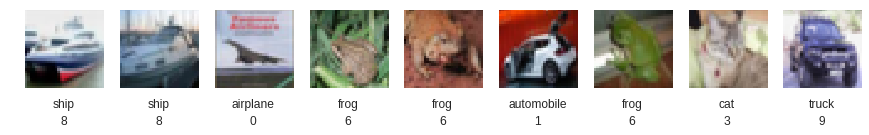

In [47]:
class_mapping = {0 : "airplane", 1 : "automobile", 2 : "bird", 3 : "cat", 4 : "deer", 5 : "dog", 6 : "frog", 7 : "horse", 8 : "ship", 9 : "truck"}

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 9
rows = 1
labels = np.argmax(model.predict(x_test[1:11]), axis=1)
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_test[i].reshape((32, 32, 3)))
    plt.axis('off')
    plt.text(15,38, class_mapping[labels[i-1]],  horizontalalignment='center', verticalalignment='center')
    plt.text(15,45, labels[i-1],  horizontalalignment='center', verticalalignment='center')

plt.show()